In [1]:
from DP.projected_gradient_ascent import projected_gradient_ascent
from DP.linear_solver import linear_solver
from DP.DP_tester import DP_tester
from DP.utils import print_matrix, binom_optimal_privacy, fisher_information_privatized, reduce_optimal_matrix

In [2]:
N = 3
EPSILON = 1.0
THETA = 0.5

opt_q, status, history = binom_optimal_privacy(projected_gradient_ascent(), N, EPSILON, THETA)
print_matrix(reduce_optimal_matrix(opt_q))
print(status)
print(fisher_information_privatized(opt_q, N, THETA))
print("==================")

opt_q, _, _ = binom_optimal_privacy(linear_solver(), N, EPSILON, THETA)
print_matrix(opt_q)
print(fisher_information_privatized(opt_q, N, THETA))

row 0: 0.3911992381435558	0.3912000836274641	0.14391429771959563	0.1439143111934145
row 1: 0.1419966400941427	0.14199669387265132	0.3859862146386974	0.3859877853497687
row 2: 0.3398593948720121	0.33985845968341577	0.12502708191101441	0.12502709417067873
row 3: 0.12694472689504416	0.1269447627638564	0.3450724057455546	0.34507080928134765
Converged after 7 iterations.
1.9219707229193834
row 0: 0.26894142136999516	0.26894142136999516	0.7310585786300049	0.7310585786300049
row 1: 0.7310585786300048	0.7310585786300048	0.2689414213699951	0.2689414213699951
1.921970403306652


4it [00:22,  5.57s/it]


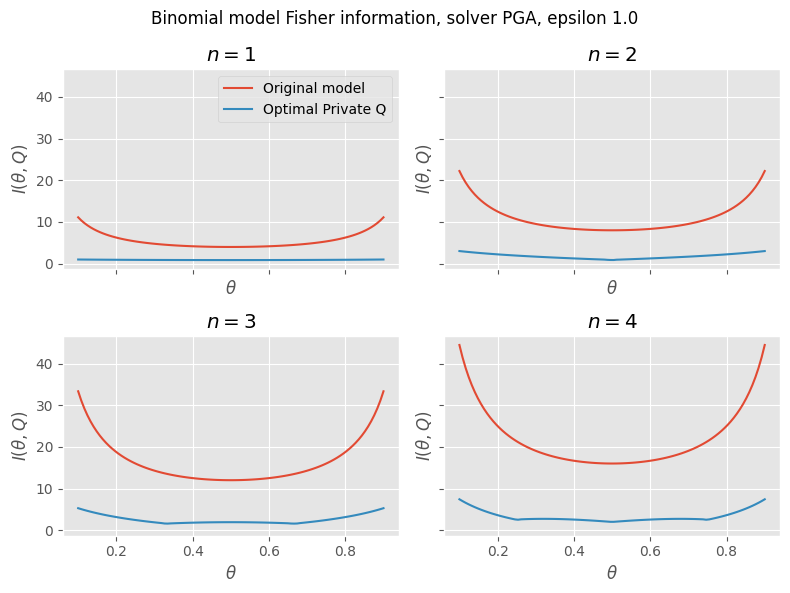

In [3]:
DP_tester.plot_fisher_infos(projected_gradient_ascent(), ns=[1, 2, 3, 4], epsilon=1.0)

100%|██████████| 100/100 [00:00<00:00, 110.98it/s]

[]


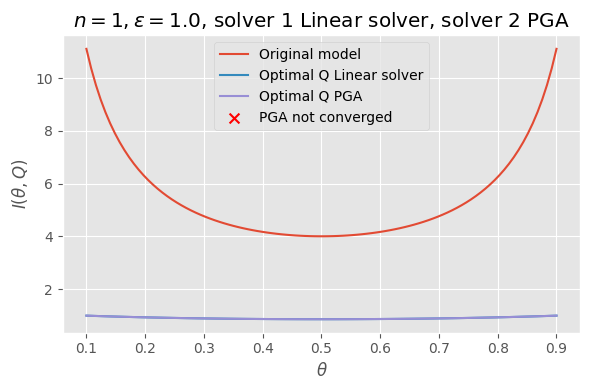

In [4]:
DP_tester.compare_fisher_two_solvers(linear_solver(), projected_gradient_ascent(), 1, 1.0)

100%|██████████| 100/100 [00:02<00:00, 36.14it/s]

[]


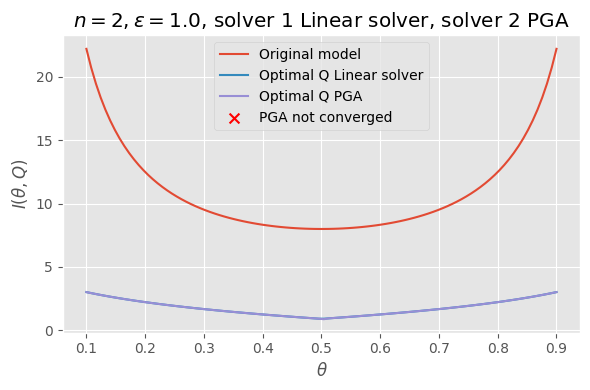

In [5]:
DP_tester.compare_fisher_two_solvers(linear_solver(), projected_gradient_ascent(), 2, 1.0)

100%|██████████| 100/100 [00:05<00:00, 17.93it/s]

[0.35050505 0.67373737]


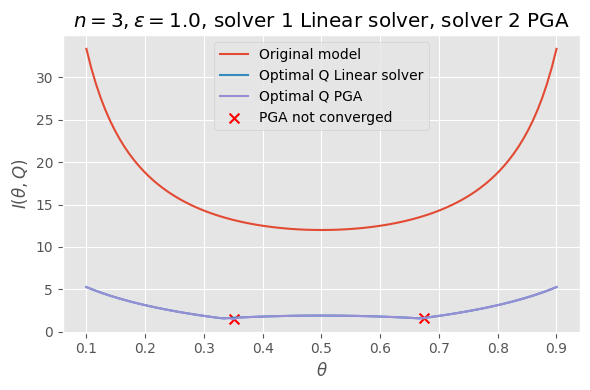

In [6]:
DP_tester.compare_fisher_two_solvers(linear_solver(), projected_gradient_ascent(), 3, 1.0)

  0%|          | 0/100 [00:00<?, ?it/s]/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/venv/lib/python3.12/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 100/100 [01:35<00:00,  1.04it/s]

[0.1        0.37474747 0.41515152]


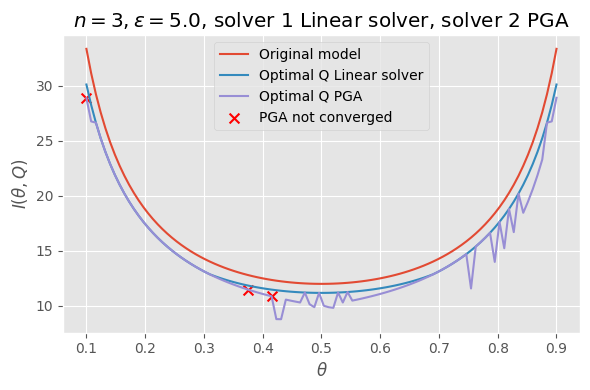

In [7]:
DP_tester.compare_fisher_two_solvers(linear_solver(), projected_gradient_ascent(), 3, 5.0)

100%|██████████| 100/100 [00:06<00:00, 15.20it/s]

[]


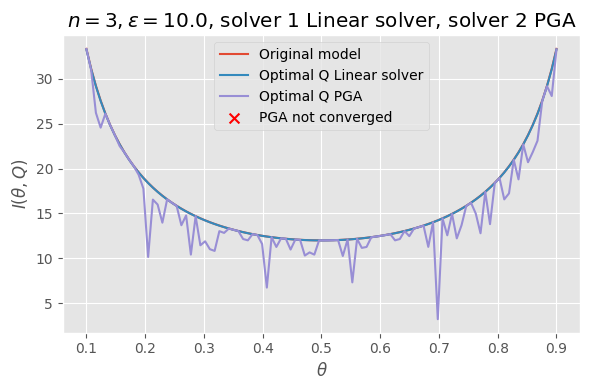

In [8]:
DP_tester.compare_fisher_two_solvers(linear_solver(), projected_gradient_ascent(), 3, 10.0)

Calculating for Linear solver


100%|██████████| 12/12 [00:00<00:00, 16.42it/s]


Calculating for PGA


100%|██████████| 12/12 [00:18<00:00,  1.53s/it]


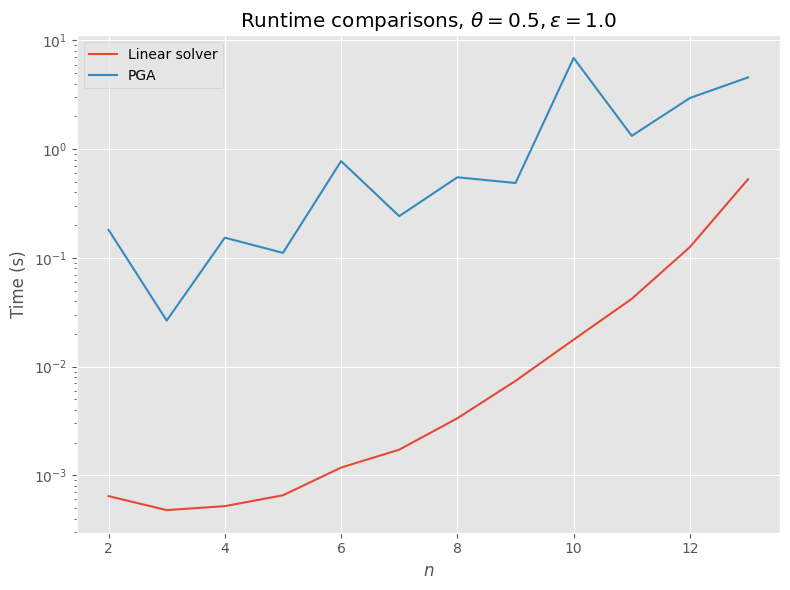

In [9]:
DP_tester.compare_runtimes([linear_solver(), projected_gradient_ascent()], [i for i in range(2, 14)], 0.5, 1.0, log=True)

100%|██████████| 100/100 [10:18<00:00,  6.18s/it]

[0.1        0.10808081 0.11616162 0.12424242 0.13232323 0.14040404
 0.14848485 0.15656566 0.16464646 0.17272727 0.18080808 0.18888889
 0.20505051 0.21313131 0.22121212 0.22929293 0.23737374 0.24545455
 0.25353535 0.26161616 0.26969697 0.27777778 0.28585859 0.29393939
 0.33434343 0.34242424 0.36666667 0.37474747 0.38282828 0.39090909
 0.3989899  0.40707071 0.41515152 0.43939394 0.47171717 0.52828283
 0.54444444 0.55252525 0.56060606 0.56868687 0.57676768 0.58484848
 0.6010101  0.60909091 0.61717172 0.62525253 0.63333333 0.64949495
 0.65757576 0.66565657 0.67373737 0.68181818 0.6979798  0.70606061
 0.71414141 0.72222222 0.73838384 0.74646465 0.75454545 0.76262626
 0.79494949 0.8030303  0.81111111 0.81919192 0.82727273 0.83535354
 0.84343434 0.85151515 0.85959596 0.86767677 0.87575758 0.88383838
 0.9       ]


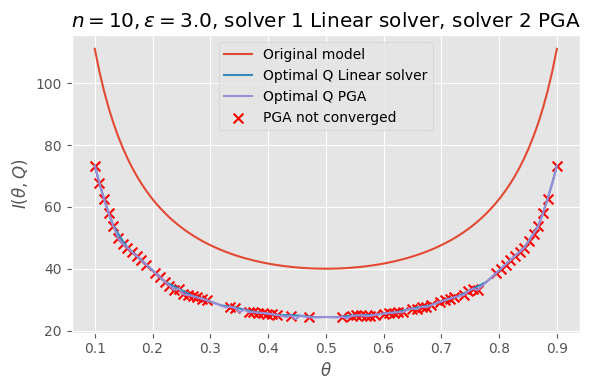

In [10]:
DP_tester.compare_fisher_two_solvers(linear_solver(), projected_gradient_ascent(), 10, 3.0)

100%|██████████| 100/100 [02:20<00:00,  1.41s/it]


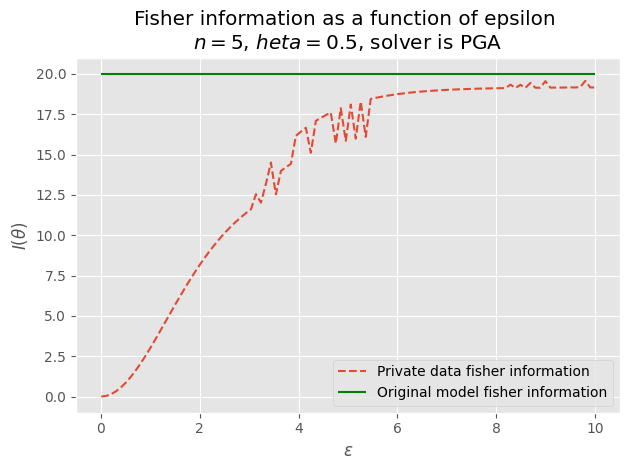

In [11]:
DP_tester.fisher_inf_vs_epsilon(projected_gradient_ascent(), 5, 0.5)